<a href="https://colab.research.google.com/github/leeyeajin/BIGDATA/blob/main/13%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#import....
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 구글 코랩에 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 가맹점이용 정보(store)

## store data 전처리

In [48]:
#가맹점 이용정보
store_file_path = '/content/store (2).csv'
store= pd.read_csv(store_file_path, encoding='utf-8')
store.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,가맹점ID,거래일자,구매금액,적립포인트,사용포인트
0,Q91325491,D,20140703,6800,68,0
1,Q91325491,D,20140812,1000,10,0
2,Q02441390,A,20140414,196000,312,0
3,Q02441390,A,20140418,330250,1651,0
4,Q02441390,A,20140522,121500,607,0


In [ ]:
#연속형 : '구매금액', '적립포인트', '사용포인트'
#범주형 : '고객ID', '가맹점ID', '거래일자'

In [49]:
#컬럼별 결측치 있는지 확인
store.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


고객ID     0
가맹점ID    0
거래일자     0
구매금액     0
적립포인트    0
사용포인트    0
dtype: int64

In [50]:
#통계량
store.iloc[:, 3:].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,구매금액,적립포인트,사용포인트
count,26044.000000,26044.000000,26044.000000
mean,46031.720511,163.970934,332.634388
std,69047.851628,448.852794,4583.568018
min,400.000000,-25.000000,-91100.000000
25%,5900.000000,21.000000,0.000000
50%,16100.000000,54.000000,0.000000
75%,54450.000000,131.000000,0.000000
max,399000.000000,17560.000000,344450.000000


In [51]:
#개수(count): 해당 열에 있는 값의 개수
#고유값(unique): 해당 열에서 고유한 값의 개수
#최빈값(top): 해당 열에서 가장 자주 나타나는 값
#최빈값의 빈도수(freq): 최빈값이 나타나는 빈도수
store.describe(include = 'O')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,가맹점ID
count,26044,26044
unique,3429,5
top,Q55478502,A
freq,116,9988


In [52]:
store.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


고객ID     object
가맹점ID    object
거래일자      int64
구매금액      int64
적립포인트     int64
사용포인트     int64
dtype: object

In [53]:
# '거래일자' 열을 datetime 형식으로 변환합니다.
store['거래일자'] = pd.to_datetime(store['거래일자'], format='%Y%m%d')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 고객정보(customer)

## customer data 전처리

In [54]:
customer_file_path = '/content/customer (2).csv'
customer= pd.read_csv(customer_file_path, encoding='utf-8')
customer.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,성별,연령,거주지역
0,Q05910452,F,29,서울 서초구 서초4동
1,Q00509389,M,20,경기 화성시 봉담읍
2,Q59112261,M,30,서울 서초구 서초4동
3,Q38120745,F,28,인천 중구 항동7가
4,Q18530082,F,42,강원 인제군 북면


In [55]:
#결측치 : 거주지역 15개
customer.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


고객ID     0
성별       0
연령       0
거주지역    15
dtype: int64

In [56]:
#결측치값 확인 : NaN='기타' 대체 or 제거
missing = customer[customer['거주지역'].isnull()]
missing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,성별,연령,거주지역
119,Q95362279,F,32,NaN
303,Q82152128,F,39,NaN
362,Q92472848,F,48,NaN
449,Q65101216,F,22,NaN
547,Q73633760,F,26,NaN
672,Q59895139,F,56,NaN
743,Q20433810,M,39,NaN
751,Q81184957,F,47,NaN
849,Q05672568,M,43,NaN
922,Q92648862,F,70,NaN


In [57]:
# 연령을 10년 단위로 범주화
# '연령대' 컬럼 추가
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대','80대']
customer['연령대'] = pd.cut(customer['연령'], bins=bins, labels=labels, right=False)
customer.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,성별,연령,거주지역,연령대
0,Q05910452,F,29,서울 서초구 서초4동,20대
1,Q00509389,M,20,경기 화성시 봉담읍,20대
2,Q59112261,M,30,서울 서초구 서초4동,30대
3,Q38120745,F,28,인천 중구 항동7가,20대
4,Q18530082,F,42,강원 인제군 북면,40대


In [58]:
# '거주지역' 열의 결측치를 '기타'로 대체
# 결측치 대체
customer['거주지역'].fillna('기타 기타 기타', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# 거주지역을 더 세분화하는 함수
# ['시','구','동']컬럼 추가
def k(i):
    parts = i.split()
    if len(parts) == 3:
        city = parts[0]
        gu = parts[1]
        dong = parts[2]
    elif len(parts) == 2:
        city = parts[0]
        gu = parts[1]
        dong = None
    else:
        city = parts[0]
        gu = None
        dong = None
    return city, gu, dong

# 새로운 열에 할당
customer[['시', '구', '동']] = pd.DataFrame(customer['거주지역'].apply(k).tolist())
print(customer[['시', '구', '동']])


       시    구     동
0     서울  서초구  서초4동
1     경기  화성시   봉담읍
2     서울  서초구  서초4동
3     인천   중구  항동7가
4     강원  인제군    북면
...   ..  ...   ...
4995  경북  영주시   순흥면
4996  대구  달서구   파호동
4997  경북  영주시  휴천2동
4998  경북  안동시   대석동
4999  경북  경주시   동천동

[5000 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 구매내역정보(sales)

## sales data 전처리

In [60]:
sales_file_path = '/content/sales (2).csv'
sales= pd.read_csv(sales_file_path, encoding='utf-8')
sales.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매건수,구매금액
0,Q00027726,A000361,AA,20140403,21,면과자,라면,2,780
1,Q00027726,A000361,AA,20140403,21,면과자,쿠키케이크,1,1600
2,Q00027726,A000363,AA,20140403,21,델리카,간편간식,1,6990
3,Q00027726,A000363,AA,20140403,21,일반식품,즉석식품,1,2500
4,Q00027726,A000364,AA,20140403,21,면과자,빵,1,1000


In [61]:
sales.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


고객ID      0
거래식별ID    0
점포ID      0
거래일자      0
거래시간대     0
상품대분류명    0
상품중분류명    0
구매건수      0
구매금액      0
dtype: int64

In [62]:
# 거래일자를 datetime 형식으로 변환
sales['거래일자'] = pd.to_datetime(sales['거래일자'], format='%Y%m%d')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# 거래시간대를 datetime 형식으로 변환, 시간 정보를 추출
sales['거래시간대'] = pd.to_datetime(sales['거래시간대'], format='%H').dt.time

# 시간대별 거래시간대를 추가하여 세분화합니다. -> '시간분류'열 추가
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

sales['시간분류'] = sales['거래시간대'].apply(lambda x: categorize_time_of_day(x.hour))
sales.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매건수,구매금액,시간분류
0,Q00027726,A000361,AA,2014-04-03,21:00:00,면과자,라면,2,780,Night
1,Q00027726,A000361,AA,2014-04-03,21:00:00,면과자,쿠키케이크,1,1600,Night
2,Q00027726,A000363,AA,2014-04-03,21:00:00,델리카,간편간식,1,6990,Night
3,Q00027726,A000363,AA,2014-04-03,21:00:00,일반식품,즉석식품,1,2500,Night
4,Q00027726,A000364,AA,2014-04-03,21:00:00,면과자,빵,1,1000,Night


In [64]:
# 데이터 형태 확인 (행,열)
print(store.shape)
print(sales.shape)
print(customer.shape)

(26044, 6)
(57198, 10)
(5000, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
#import....
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import pandas as pd
import plotly.graph_objects as go
import numpy as np

plt.rcParams['font.family'] = 'Arial Unicode MS'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
#store는 별개
#customer,sales 합쳐서 분석

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
#전처리 ~한번에 코드

#Store
store= pd.read_csv('/content/store (2).csv', encoding='utf-8')
store.head()
# '거래일자' 열을 datetime 형식으로 변환합니다.
store['거래일자'] = pd.to_datetime(store['거래일자'], format='%Y%m%d')


#Customer
customer= pd.read_csv('/content/customer (2).csv', encoding='utf-8')
# 연령을 10년 단위로 범주화
# '연령대' 컬럼 추가
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대','80대']
customer['연령대'] = pd.cut(customer['연령'], bins=bins, labels=labels, right=False)
# '거주지역' 열의 결측치를 '기타'로 대체
# 결측치 대체
customer['거주지역'].fillna('기타 기타 기타', inplace=True)
customer

# 거주지역을 더 세분화하는 함수
# ['시','구','동']컬럼 추가
def k(i):
    parts = i.split()
    if len(parts) == 3:
        city = parts[0]
        gu = parts[1]
        dong = parts[2]
    elif len(parts) == 2:
        city = parts[0]
        gu = parts[1]
        dong = None
    else:
        city = parts[0]
        gu = None
        dong = None
    return city, gu, dong

# 새로운 열에 할당
customer[['시', '구', '동']] = pd.DataFrame(customer['거주지역'].apply(k).tolist())




#Sales
sales= pd.read_csv('/content/sales (2).csv', encoding='utf-8')
sales.head()
# 거래일자를 datetime 형식으로 변환
sales['거래일자'] = pd.to_datetime(sales['거래일자'], format='%Y%m%d')
# 거래시간대를 datetime 형식으로 변환, 시간 정보를 추출
sales['거래시간대'] = pd.to_datetime(sales['거래시간대'], format='%H').dt.time
# 시간대별 거래시간대를 추가하여 세분화합니다. -> '시간분류'열 추가
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
sales['시간분류'] = sales['거래시간대'].apply(lambda x: categorize_time_of_day(x.hour))
# 거래일자 열에서 월 정보만 추출하여 새로운 열 추가
sales['월'] = sales['거래일자'].dt.month







#sales + customer
merged_df = pd.merge(sales, customer, on='고객ID')
merged_df

# merged_df['거래시간대'] 열의 데이터 타입을 문자열로 변환 후 datetime으로 변환
merged_df['거래시간대'] = pd.to_datetime(merged_df['거래시간대'].astype(str))

# '거래시간대' 열에서 날짜 정보를 없애고 시간 정보만 추출
merged_df['거래시간대'] = merged_df['거래시간대'].dt.strftime('%H:%M:%S')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-e629b118aea4>:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['거래시간대'] = pd.to_datetime(merged_df['거래시간대'].astype(str))


In [70]:
#그래프 너무 크거나 작으면 -> figsize=(8, 15) 조절

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# EDA 탐색

## 가맹점이용정보(Store)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


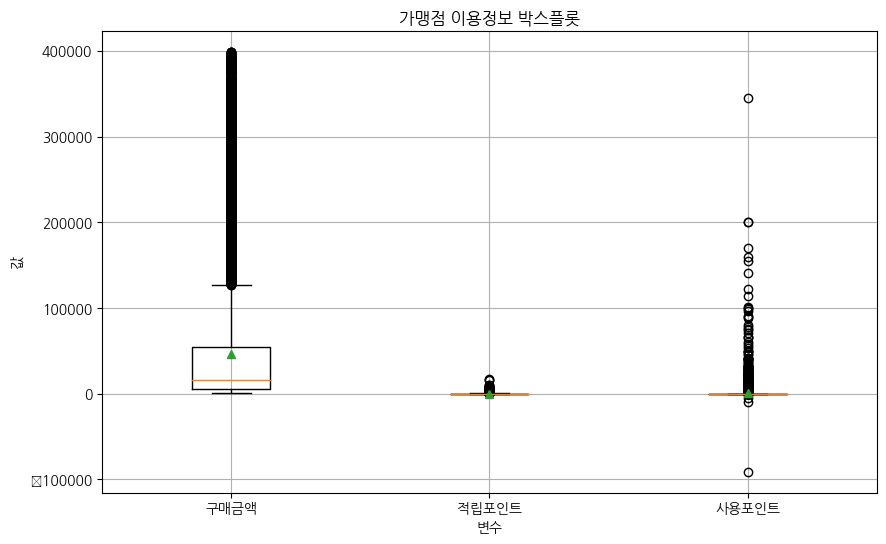

In [78]:
#가맹점 이용정보 박스플롯


# 데이터 프레임에서 해당 열 선택
data = [store['구매금액'], store['적립포인트'], store['사용포인트']]

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['구매금액', '적립포인트', '사용포인트'], showmeans=True)

# 레이아웃 설정
plt.title('가맹점 이용정보 박스플롯')
plt.xlabel('변수')
plt.ylabel('값')
plt.grid(True)

# 그래프 출력
plt.show()

#구매금액: 평균 구매금액:46,032원, 최소구매금액:400원 , 최대구매금액:399,000원, 표준편차:69,048
#적립포인트 :평균 적립포인트: 164 , 최소적립포인트:-25 , 최대적립포인트: 17,560 ,표준편차:449
#사용포인트 : 평균 사용포인트:333, ,최소사용포인트: -91,100, 최대사용포인트: 344,450점, 표준편차:4,584
#                    -> 세관측치 모두 편차가 매우 크다

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


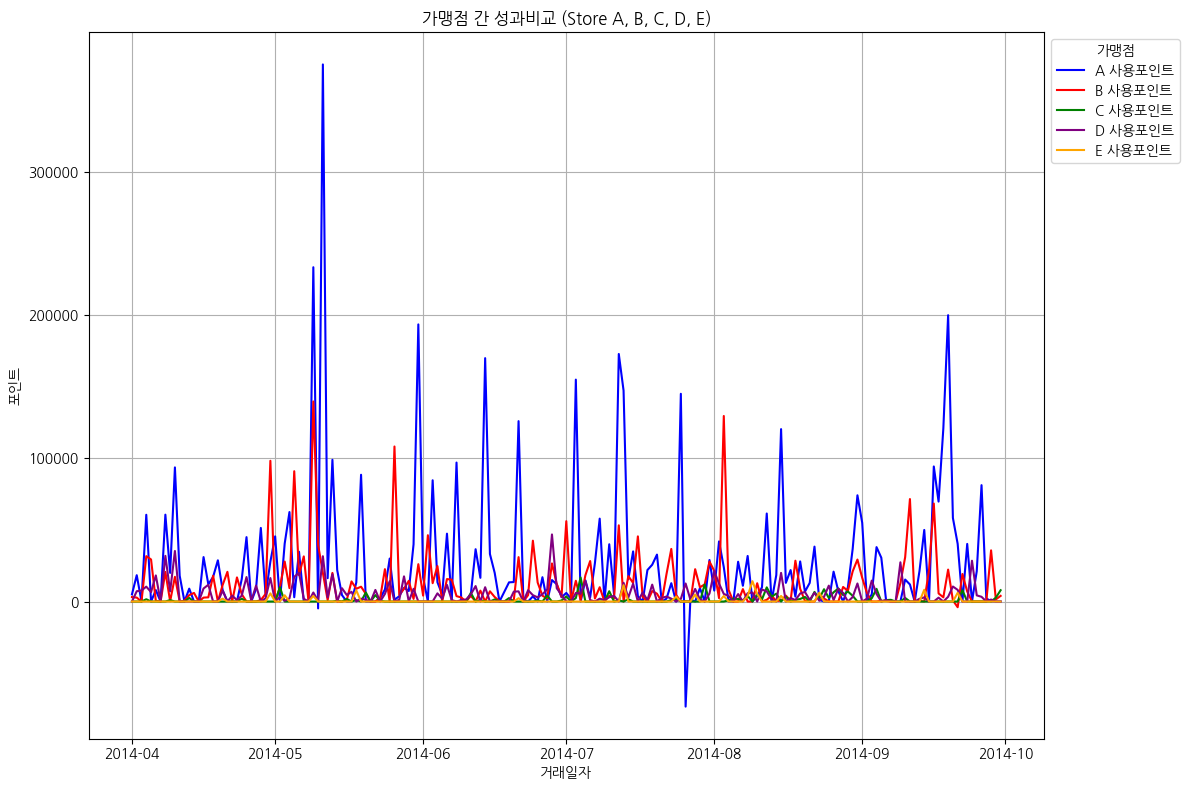

In [79]:
#가맹점 간 성과 비교(사용포인트 비교)

# 가맹점별로 데이터프레임 분리
store_A = store[store['가맹점ID'] == 'A']
store_B = store[store['가맹점ID'] == 'B']
store_C = store[store['가맹점ID'] == 'C']
store_D = store[store['가맹점ID'] == 'D']
store_E = store[store['가맹점ID'] == 'E']

# 각 가맹점별 사용포인트 계산
daily_usage_points_A = store_A.groupby('거래일자')[['사용포인트']].sum().reset_index()
daily_usage_points_B = store_B.groupby('거래일자')[['사용포인트']].sum().reset_index()
daily_usage_points_C = store_C.groupby('거래일자')[['사용포인트']].sum().reset_index()
daily_usage_points_D = store_D.groupby('거래일자')[['사용포인트']].sum().reset_index()
daily_usage_points_E = store_E.groupby('거래일자')[['사용포인트']].sum().reset_index()

# 사용포인트 그래프 생성
plt.figure(figsize=(12, 8))

# 각 가맹점별 사용포인트 선 그래프 추가
plt.plot(daily_usage_points_A['거래일자'], daily_usage_points_A['사용포인트'], label='A 사용포인트', color='blue')
plt.plot(daily_usage_points_B['거래일자'], daily_usage_points_B['사용포인트'], label='B 사용포인트', color='red')
plt.plot(daily_usage_points_C['거래일자'], daily_usage_points_C['사용포인트'], label='C 사용포인트', color='green')
plt.plot(daily_usage_points_D['거래일자'], daily_usage_points_D['사용포인트'], label='D 사용포인트', color='purple')
plt.plot(daily_usage_points_E['거래일자'], daily_usage_points_E['사용포인트'], label='E 사용포인트', color='orange')

# 레이아웃 설정
plt.title('가맹점 간 성과비교 (Store A, B, C, D, E)')
plt.xlabel('거래일자')
plt.ylabel('포인트')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='가맹점')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


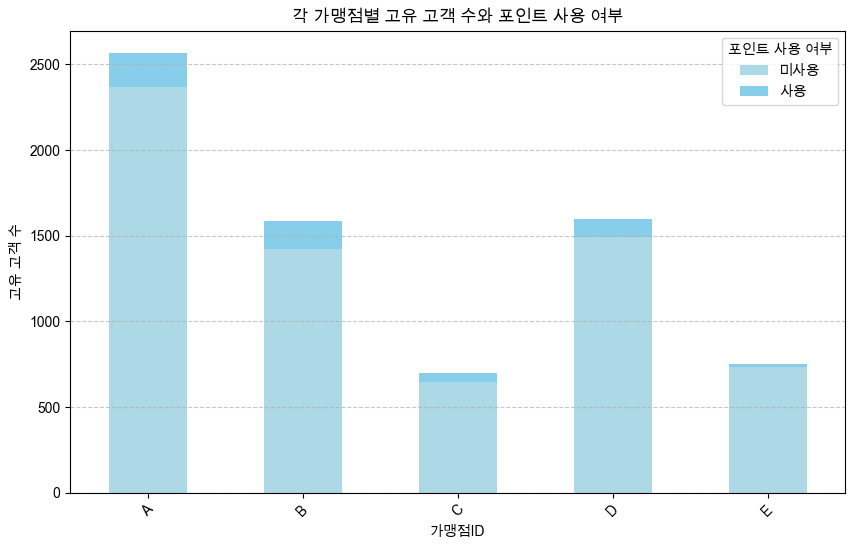

In [ ]:

# 포인트 사용 여부에 따라 고객 분류
store['포인트 사용 여부'] = store['사용포인트'] > 0

# 각 가맹점별로 고객ID의 고유 개수와 포인트 사용 여부 계산
customer_count_by_store = store.groupby(['가맹점ID', '포인트 사용 여부'])['고객ID'].nunique().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
customer_count_by_store.plot(kind='bar', stacked=True, color=['lightblue', 'skyblue'], ax=plt.gca())
plt.title('각 가맹점별 고유 고객 수와 포인트 사용 여부')
plt.xlabel('가맹점ID')
plt.ylabel('고유 고객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='포인트 사용 여부', labels=['미사용', '사용'])
plt.show()


## Customer + Sales

## 상품(상품대분류별)

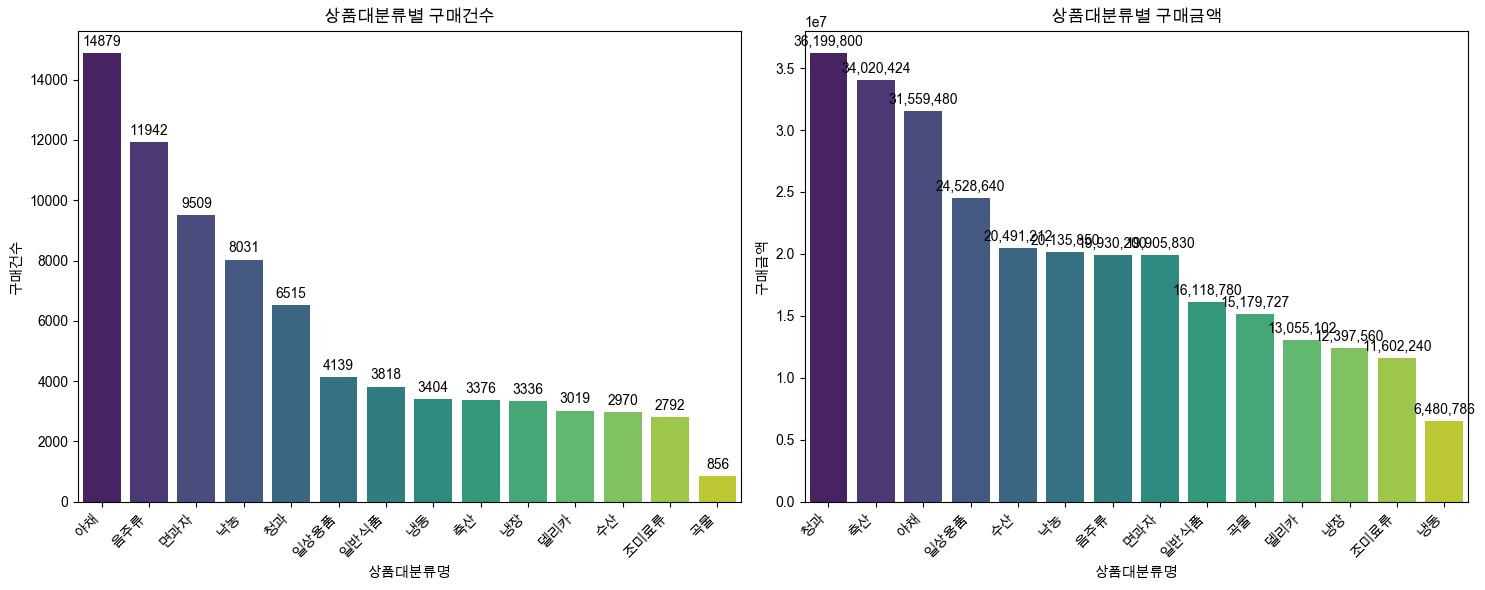

In [ ]:
# 상품대분류별 구매건수 계산
purchase_counts = merged_df.groupby('상품대분류명')['구매건수'].sum().reset_index()

# 구매건수를 기준으로 내림차순 정렬
purchase_counts = purchase_counts.sort_values(by='구매건수', ascending=False)

# 상품대분류별 구매금액 계산
purchase_amounts = merged_df.groupby('상품대분류명')['구매금액'].sum().reset_index()

# 구매금액을 기준으로 내림차순 정렬
purchase_amounts = purchase_amounts.sort_values(by='구매금액', ascending=False)

# 그래프 크기 및 서브플롯 설정
plt.figure(figsize=(15, 6))

# 첫 번째 서브플롯: 상품대분류별 구매건수
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=purchase_counts, x='상품대분류명', y='구매건수', palette='viridis')
plt.title('상품대분류별 구매건수')
plt.xlabel('상품대분류명')
plt.ylabel('구매건수')
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 값을 표시
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate('{}'.format(int(height)),
                 xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

# 두 번째 서브플롯: 상품대분류별 구매금액
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=purchase_amounts, x='상품대분류명', y='구매금액', palette='viridis')
plt.title('상품대분류별 구매금액')
plt.xlabel('상품대분류명')
plt.ylabel('구매금액')
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 값을 표시
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate('{:,}'.format(int(height)),
                 xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

plt.tight_layout()
plt.show()


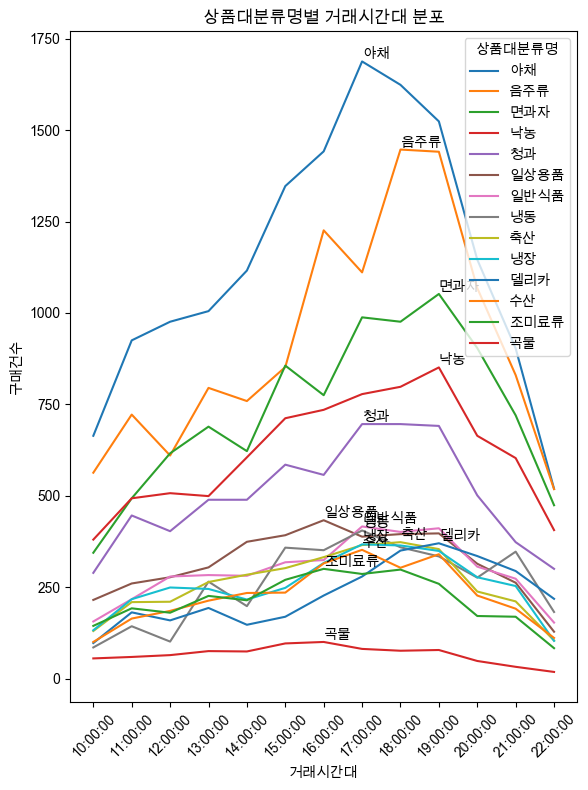

In [ ]:
# 각 상품대분류명별로 구매건수의 합 계산
time_distribution = merged_df.groupby(['상품대분류명', '거래시간대'])['구매건수'].sum().unstack(fill_value=0)

# 범례를 상품별로 y의 최댓값이 높은 순으로 정렬
order = time_distribution.sum(axis=1).sort_values(ascending=False).index

# 시각화
plt.figure(figsize=(6, 8))
for category in order:
    plt.plot(time_distribution.columns, time_distribution.loc[category], label=category)

    # 각 선 그래프의 최대 지점 찾기
    max_value = time_distribution.loc[category].max()
    max_index = time_distribution.loc[category].idxmax()

    # 최대 지점에 상품 대분류명 표시
    plt.text(max_index, max_value, category, horizontalalignment='left', verticalalignment='bottom')

plt.title('상품대분류명별 거래시간대 분포')
plt.xlabel('거래시간대')
plt.ylabel('구매건수')
plt.xticks(rotation=45)
plt.legend(title='상품대분류명', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/3000620954.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/3000620954.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



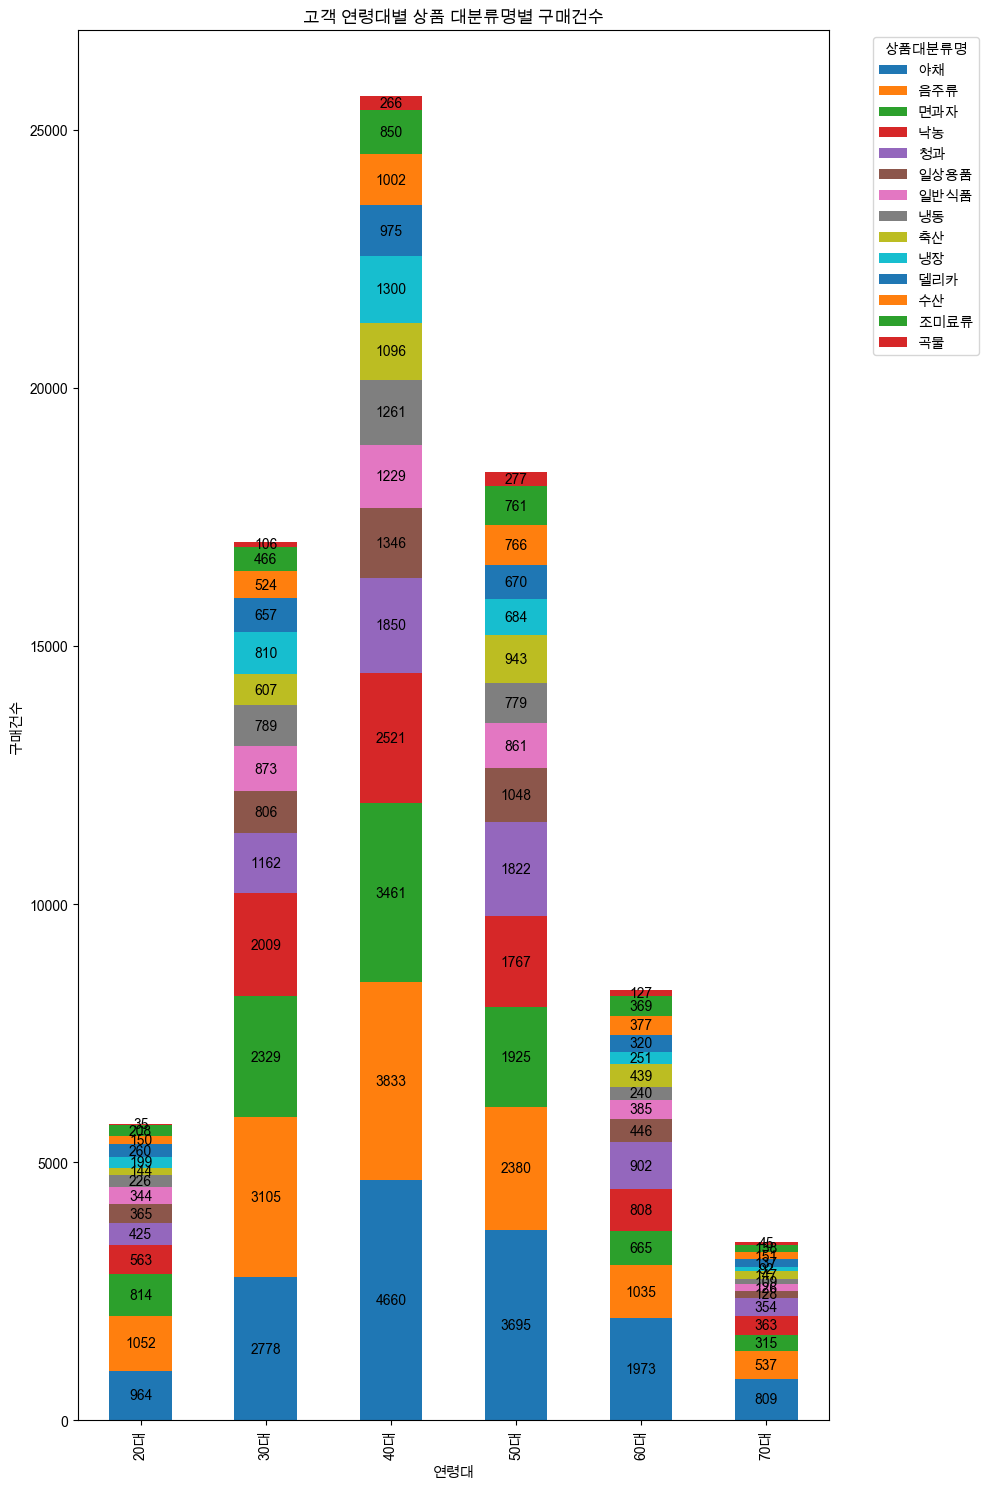

In [ ]:
#고객 연령대별로 어떤 상품 대분류가 얼마나 많이 구매되는지 파악할 수 있습니다.

# 고객 연령대별 상품 대분류명별 구매건수 계산
age_category_purchase = merged_df.groupby(['연령대', '상품대분류명'])['구매건수'].sum().reset_index()

# 10대와 80대를 제외
filtered_age_category_purchase = age_category_purchase[~age_category_purchase['연령대'].isin(['10대', '80대'])]

# 구매건수가 큰 순서대로 정렬
order = filtered_age_category_purchase.groupby('상품대분류명')['구매건수'].sum().sort_values(ascending=False).index
filtered_age_category_purchase['상품대분류명'] = pd.Categorical(filtered_age_category_purchase['상품대분류명'], categories=order, ordered=True)

# 데이터 준비
pivot_table = filtered_age_category_purchase.pivot(index='연령대', columns='상품대분류명', values='구매건수')

# 시각화
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 15))

# 각 스택에 구매건수 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

# 레이아웃 설정
plt.title('고객 연령대별 상품 대분류명별 구매건수')
plt.xlabel('연령대')
plt.ylabel('구매건수')
plt.legend(title='상품대분류명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 출력
plt.show()


/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/2053777198.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_purchase_amount = merged_df.groupby(['연령대', '상품대분류명'])['구매금액'].sum().reset_index()
/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/2053777198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_age_category_purchase_amount['연령대'] = pd.Categorical(filtered_age_category_purchase_amount['연령대'], categories=age_order, ordered=True)


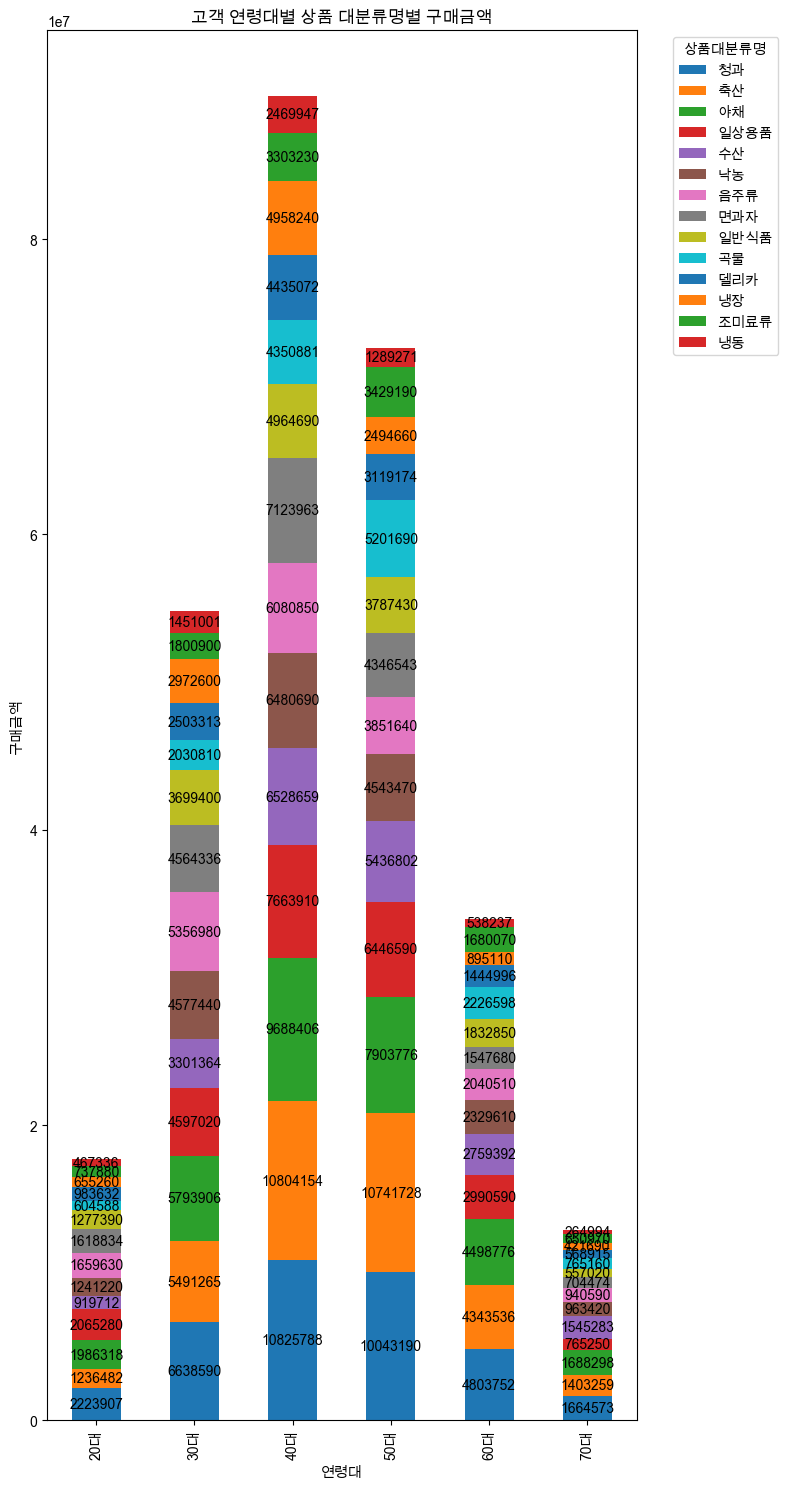

In [ ]:
# 고객 연령대별로 어떤 상품 대분류가 얼마나 많은 구매금액을 차지하는지 시각적으로 파악할 수 있습니다.

# 고객 연령대별 상품 대분류명별 구매금액 계산
age_category_purchase_amount = merged_df.groupby(['연령대', '상품대분류명'])['구매금액'].sum().reset_index()

# 10대와 80대를 제외하고 연령대 순서 설정
age_order = ['20대', '30대', '40대', '50대', '60대', '70대']
filtered_age_category_purchase_amount = age_category_purchase_amount[age_category_purchase_amount['연령대'].isin(age_order)]

# 연령대를 카테고리형으로 변환
filtered_age_category_purchase_amount['연령대'] = pd.Categorical(filtered_age_category_purchase_amount['연령대'], categories=age_order, ordered=True)

# 데이터 준비
pivot_table = filtered_age_category_purchase_amount.pivot(index='연령대', columns='상품대분류명', values='구매금액')

# 스택별로 구매금액이 큰 순서대로 정렬
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

# 시각화
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(8, 15))

# 각 스택에 구매금액 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

# 레이아웃 설정
plt.title('고객 연령대별 상품 대분류명별 구매금액')
plt.xlabel('연령대')
plt.ylabel('구매금액')
plt.legend(title='상품대분류명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 출력
plt.show()


## 고객(연령대별, 성별)

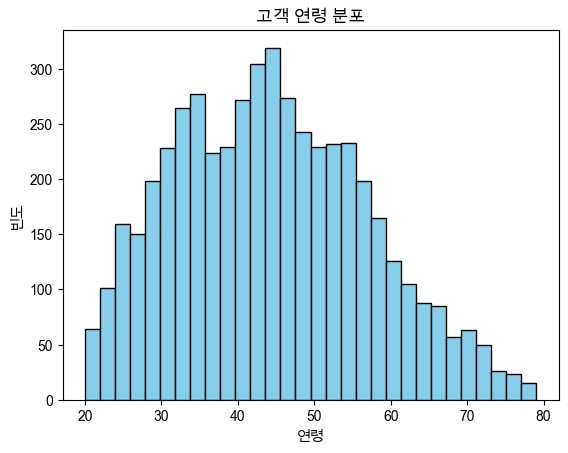

In [ ]:
plt.hist(customer['연령'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.title('고객 연령 분포')
plt.show()

/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/3888944293.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/3888944293.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



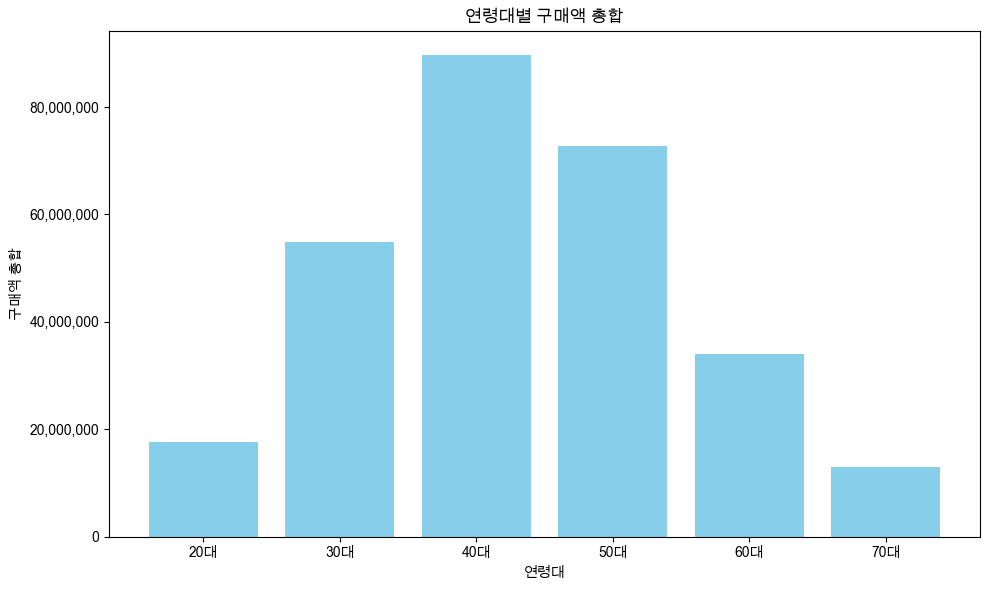

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 연령대별 구매액 총합 계산
age_purchase_sum = merged_df.groupby('연령대')['구매금액'].sum().reset_index()

# 10대와 80대를 제외하고 연령대 순서 설정
age_order = ['20대', '30대', '40대', '50대', '60대', '70대']
filtered_age_purchase_sum = age_purchase_sum[age_purchase_sum['연령대'].isin(age_order)]

# 연령대를 카테고리형으로 변환하여 순서를 지정
filtered_age_purchase_sum['연령대'] = pd.Categorical(filtered_age_purchase_sum['연령대'], categories=age_order, ordered=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(filtered_age_purchase_sum['연령대'], filtered_age_purchase_sum['구매금액'], color='skyblue')

# 레이아웃 설정
plt.title('연령대별 구매액 총합')
plt.xlabel('연령대')
plt.ylabel('구매액 총합')

# x축과 y축의 숫자 형식을 변경
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 그래프 출력
plt.tight_layout()
plt.show()


/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/938490236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age = customer.groupby(['성별', '연령대']).size().unstack(fill_value=0)


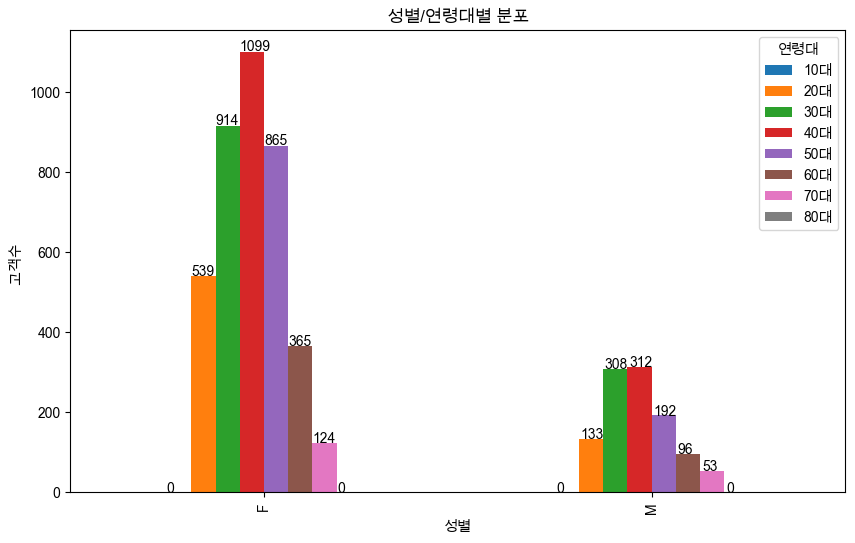

In [ ]:
# 성별/연령대별 분포 계산
gender_age = customer.groupby(['성별', '연령대']).size().unstack(fill_value=0)
gender_age

#시각화
ax = gender_age.plot(kind='bar', figsize=(10, 6))
plt.title('성별/연령대별 분포')
plt.xlabel('성별')
plt.ylabel('고객수 ')
plt.legend(title='연령대')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_3741/1031701560.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_purchase_count = merged_df.groupby(['성별', '연령대'])['구매건수'].sum().reset_index()


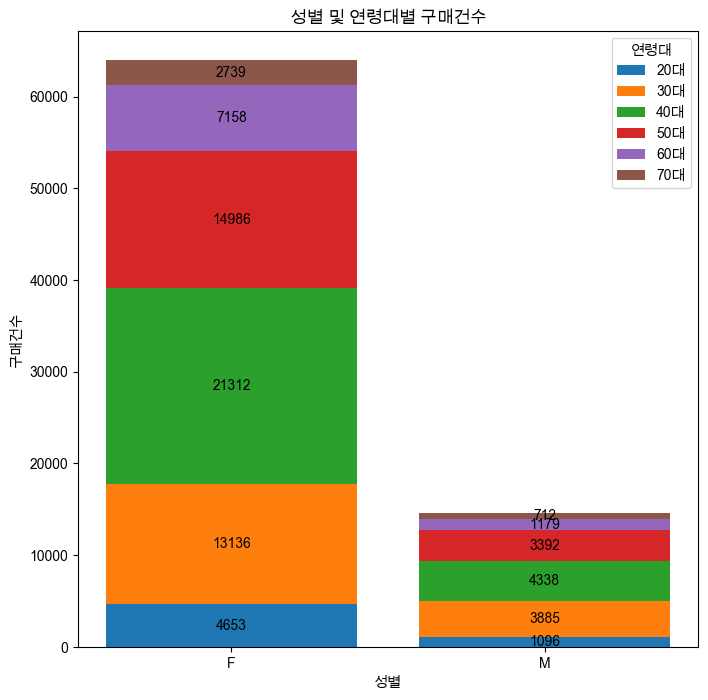

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그룹별 구매건수 데이터 생성
gender_age_purchase_count = merged_df.groupby(['성별', '연령대'])['구매건수'].sum().reset_index()

# 성별, 연령대, 구매건수 추출
genders = gender_age_purchase_count['성별'].unique()
ages = gender_age_purchase_count['연령대'].unique()
purchase_counts = gender_age_purchase_count['구매건수'].values.reshape((len(genders), len(ages)))

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(8, 8))

# 누적 변수 초기화
bottom = np.zeros(len(genders))

for i, age in enumerate(ages):
    # 10대와 80대일 때는 막대를 그리지 않음
    if age in ['10대', '80대']:
        continue

    bars = ax.bar(genders, purchase_counts[:, i], label=str(age), bottom=bottom)
    bottom += purchase_counts[:, i]  # 누적값 업데이트

    # 스택 위에 숫자 표시
    for j, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bottom[j] - purchase_counts[j, i] / 2, f'{purchase_counts[j, i]}',
                ha='center', va='center', color='black')

ax.set_xlabel('성별')
ax.set_ylabel('구매건수')
ax.set_title('성별 및 연령대별 구매건수')
ax.legend(title='연령대')

plt.show()


In [ ]:
#그래프 드래그 -> zoom
#2000~3000원대의 제품을 가장많이 구매
# 구매금액을 1,000원 단위로 나누어 새로운 카테고리 생성
merged_df['구매금액_카테고리'] = np.ceil(merged_df['구매금액'] / 1000)

# 연령대별로 구매금액 카테고리별로 카운트
age_purchase_count = merged_df.groupby(['연령대', '구매금액_카테고리']).size().unstack(fill_value=0)

# 80대와 10대 행 삭제
age_purchase_count = age_purchase_count.drop(labels=['10대', '80대'], axis=0)

# Plotly 히트맵 그리기
fig = px.imshow(age_purchase_count, labels=dict(x="구매금액(1천원 단위)", y="연령대", color="구매건수"),
                x=age_purchase_count.columns, y=age_purchase_count.index,
                title="연령대별 구매금액 카테고리별 구매건수", color_continuous_scale='viridis')

# y축의 픽셀을 늘리기
fig.update_layout(yaxis=dict(tickmode='array', tickvals=np.arange(len(age_purchase_count.index)),
                              ticktext=age_purchase_count.index), height=600)

# x축 레이블 설정
fig.update_layout(xaxis=dict(tickmode='array', tickvals=np.arange(len(age_purchase_count.columns)),
                              ticktext=[f'{i*1000}-{(i+1)*1000}' for i in range(len(age_purchase_count.columns))]))

fig.update_yaxes(type='category', title="연령대")
fig.show()


/var/folders/nd/j25fj96j2zj0zhvdhv39s26r0000gn/T/ipykernel_6514/3131387182.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/gyohyeon/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/gyohyeon/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## 고객(지역별)

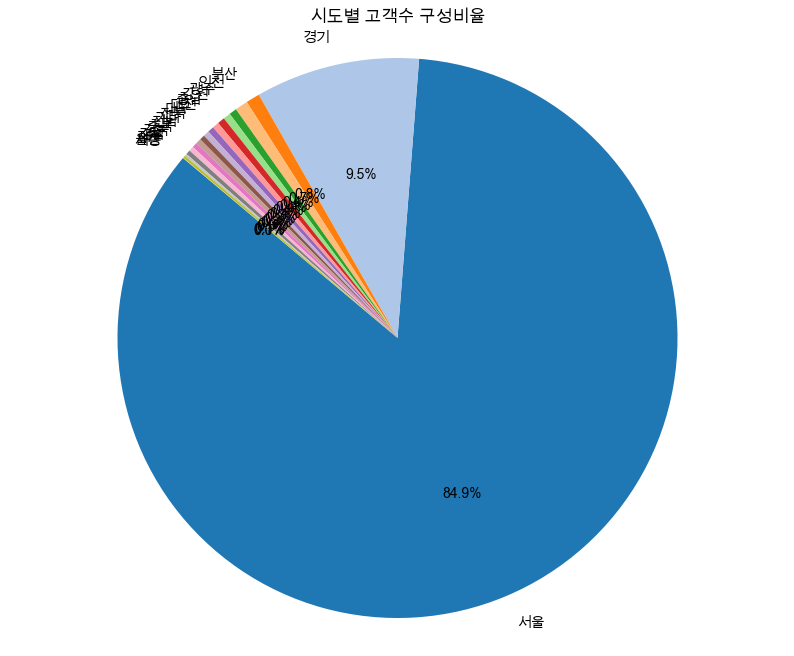

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 시도별 고객 수 계산
region_customer_count = customer['시'].value_counts().reset_index()
region_customer_count.columns = ['시', '고객수']

# 시각화
plt.figure(figsize=(10, 8))
plt.pie(region_customer_count['고객수'], labels=region_customer_count['시'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# 레이아웃 설정
plt.title('시도별 고객수 구성비율')
plt.axis('equal')  # 원형 그래프를 원형으로 보이게 설정

# 그래프 출력
plt.show()


## 월별 활동 고객수

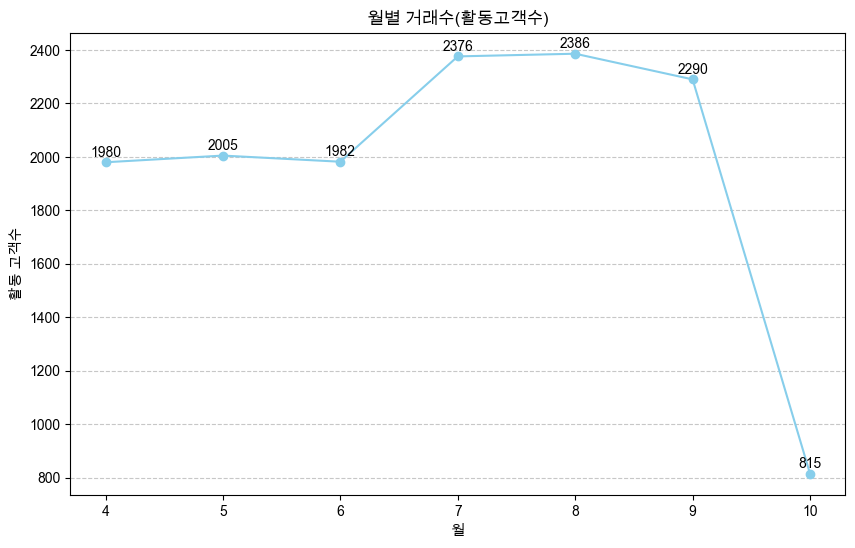

In [ ]:
# 거래일자 열을 날짜 형식으로 변환
sales['거래일자'] = pd.to_datetime(sales['거래일자'], format='%Y%m%d')

# 거래일자 열에서 월 정보만 추출하여 새로운 열 추가
sales['월'] = sales['거래일자'].dt.month

# 월별 활동고객수 계산
monthly_active_customers = sales.groupby('월')['고객ID'].nunique()

# 결과 출력
print("월별 활동고객수:\n", monthly_active_customers)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_active_customers.index, monthly_active_customers.values, marker='o', color='skyblue', linestyle='-')
plt.title('월별 거래수(활동고객수)')
plt.xlabel('월')
plt.ylabel('활동 고객수')
plt.xticks(monthly_active_customers.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in zip(monthly_active_customers.index, monthly_active_customers.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

/Users/gyohyeon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/gyohyeon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/gyohyeon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/gyohyeon/anaconda3/lib/python3

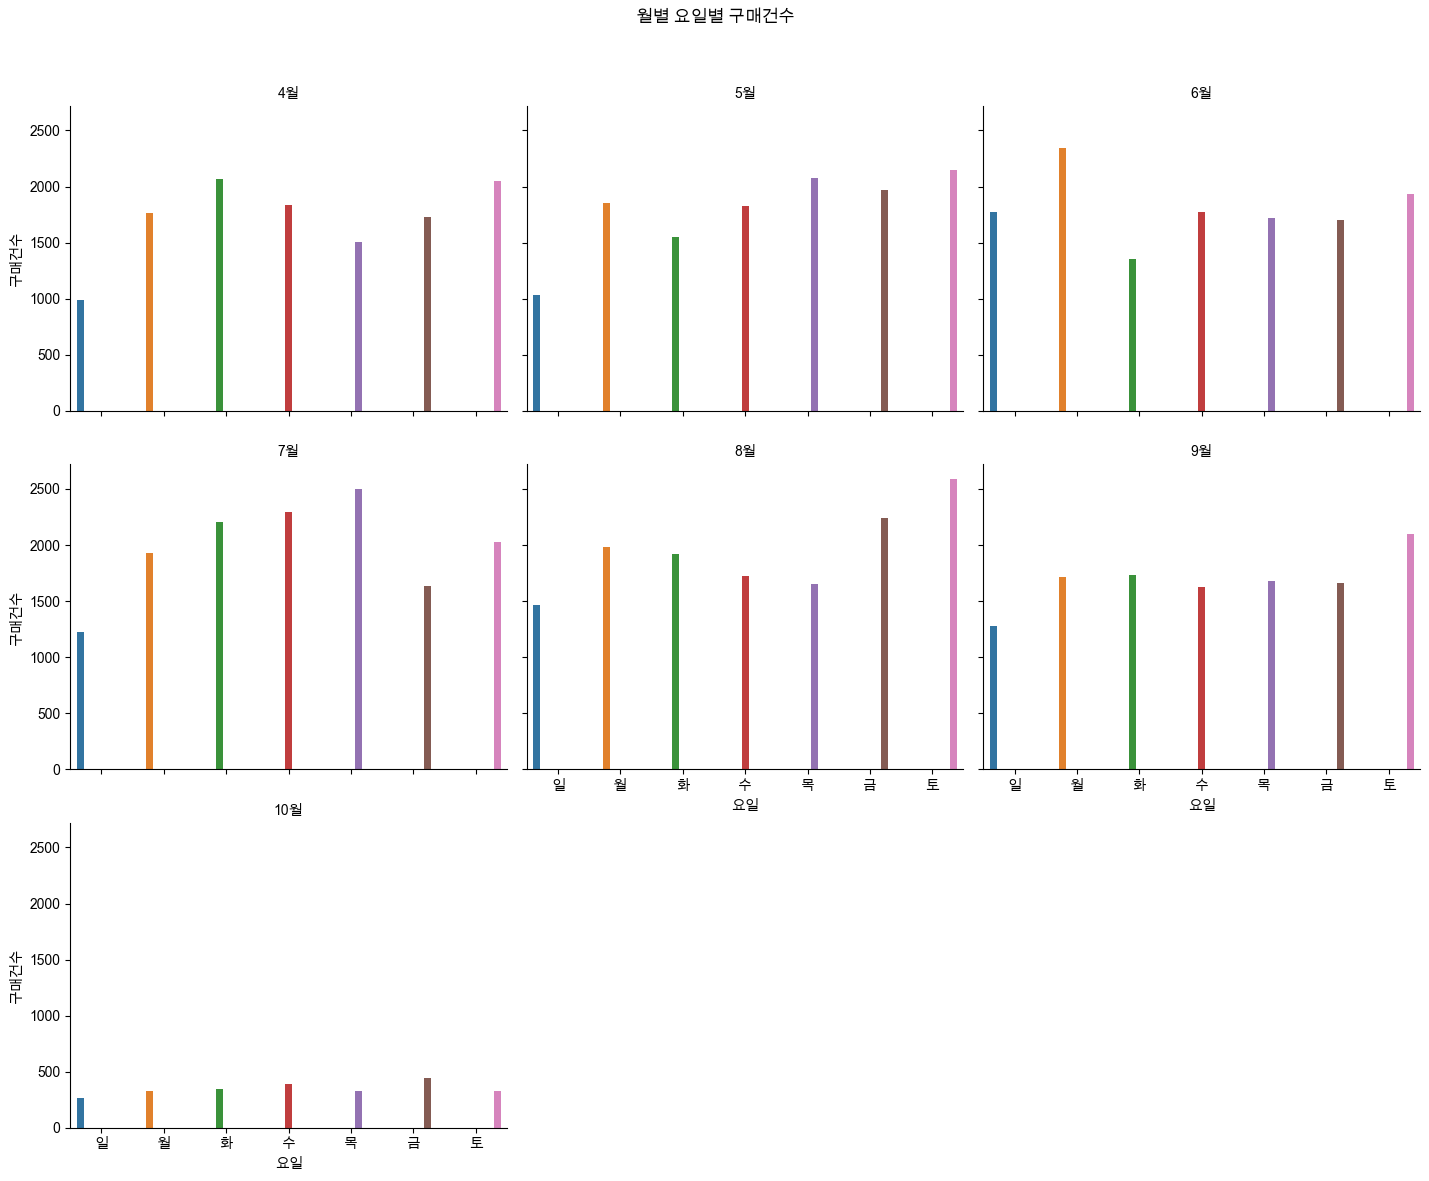

In [ ]:
#요일별
#일->월->화->수->목->금 순으로

# '거래일자' 열에서 요일을 추출하여 새로운 열 추가
merged_df['요일'] = merged_df['거래일자'].dt.dayofweek

# 요일을 한글로 변환
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
merged_df['요일'] = merged_df['요일'].map(weekday_map)

# 월별, 요일별 구매건수 계산
month_weekday_purchase_count = merged_df.groupby(['월', '요일'])['구매건수'].sum().reset_index()

# 요일 순서 설정
weekday_order = ['일', '월', '화', '수', '목', '금', '토']
month_weekday_purchase_count['요일'] = pd.Categorical(month_weekday_purchase_count['요일'], categories=weekday_order, ordered=True)

# 시각화
g = sns.catplot(
    data=month_weekday_purchase_count,
    x='요일', y='구매건수', hue='요일', col='월',
    kind='bar', order=weekday_order, col_wrap=3, height=4, aspect=1.2
)

# 레이아웃 설정
g.set_axis_labels("요일", "구매건수")
g.set_titles("{col_name}월")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('월별 요일별 구매건수')

# 그래프 출력
plt.show()


## 여성 40대 서울지역 세부분석

In [ ]:
대부분의 구매금액 분포가 7000원 이하:

그래프에서 볼 수 있듯이, 7000원 이하의 구매가 전체 구매의 대부분을 차지하고 있습니다. 7000원 임계값 아래에 많은 데이터 포인트가 몰려있음을 알 수 있습니다.
7000원 임계값은 데이터 분포의 주요 지점을 나타내며, 이는 고객의 주요 구매 패턴이 7000원 이하에서 집중된다는 것을 의미합니다.
고가 구매는 상대적으로 드물다:

7000원 이상의 구매는 상대적으로 드물며, 이는 그래프에서 극히 적은 데이터 포인트가 7000원 이상 영역에 분포해 있음을 보여줍니다.
고가 구매는 특정 고객에 의해 이루어질 가능성이 높습니다.

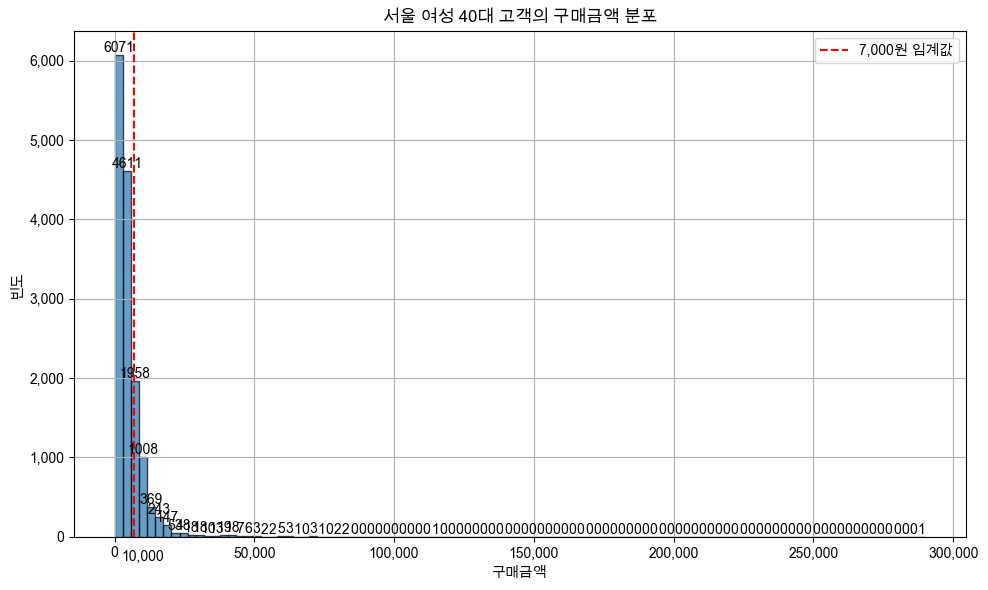

In [ ]:
import matplotlib.pyplot as plt

# 서울 여성 40대 고객으로 필터링
filtered_df = merged_df[(merged_df['성별'] == 'F') &
                        (merged_df['연령대'] == '40대') &
                        (merged_df['시'] == '서울')]

# 히스토그램 생성
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_df['구매금액'], bins=100, edgecolor='black', alpha=0.7)

# 막대마다 빈도 표시
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')

# 10,000에 해당하는 부분에 레이블 추가
plt.text(10000, -0.05 * max(n), "10,000", ha='center', fontsize=10)

# 7,000원 임계값 추가
plt.axvline(x=7000, color='r', linestyle='--', label='7,000원 임계값')

# 레이아웃 설정
plt.title('서울 여성 40대 고객의 구매금액 분포')
plt.xlabel('구매금액')
plt.ylabel('빈도')
plt.grid(True)

# x축과 y축의 숫자 형식을 변경
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 40대 서울지역 여성 필터링
filtered_data = merged_df[(merged_df['연령대'] == '40대') & (merged_df['시'] == '서울') & (merged_df['성별'] == 'F')]

# 10,000원 이하와 10,000원 이상으로 나누기
below_10000 = filtered_data[filtered_data['구매금액'] <= 7000]
above_10000 = filtered_data[filtered_data['구매금액'] > 7000]

# 10,000원 이하와 10,000원 이상의 구매건수 계산
below_10000_count = below_10000['구매건수'].sum()
above_10000_count = above_10000['구매건수'].sum()

# 전체 구매건수 계산
total_count = below_10000_count + above_10000_count

# 비율 계산
below_10000_ratio = below_10000_count / total_count * 100
above_10000_ratio = above_10000_count / total_count * 100

# 결과 출력
print(f"40대 서울지역 여성의 7,000원 이하 상품 구매 비율: {below_10000_ratio:.2f}%")
print(f"40대 서울지역 여성의 7,000원 이상 상품 구매 비율: {above_10000_ratio:.2f}%")


40대 서울지역 여성의 7,000원 이하 상품 구매 비율: 75.90%
40대 서울지역 여성의 7,000원 이상 상품 구매 비율: 24.10%


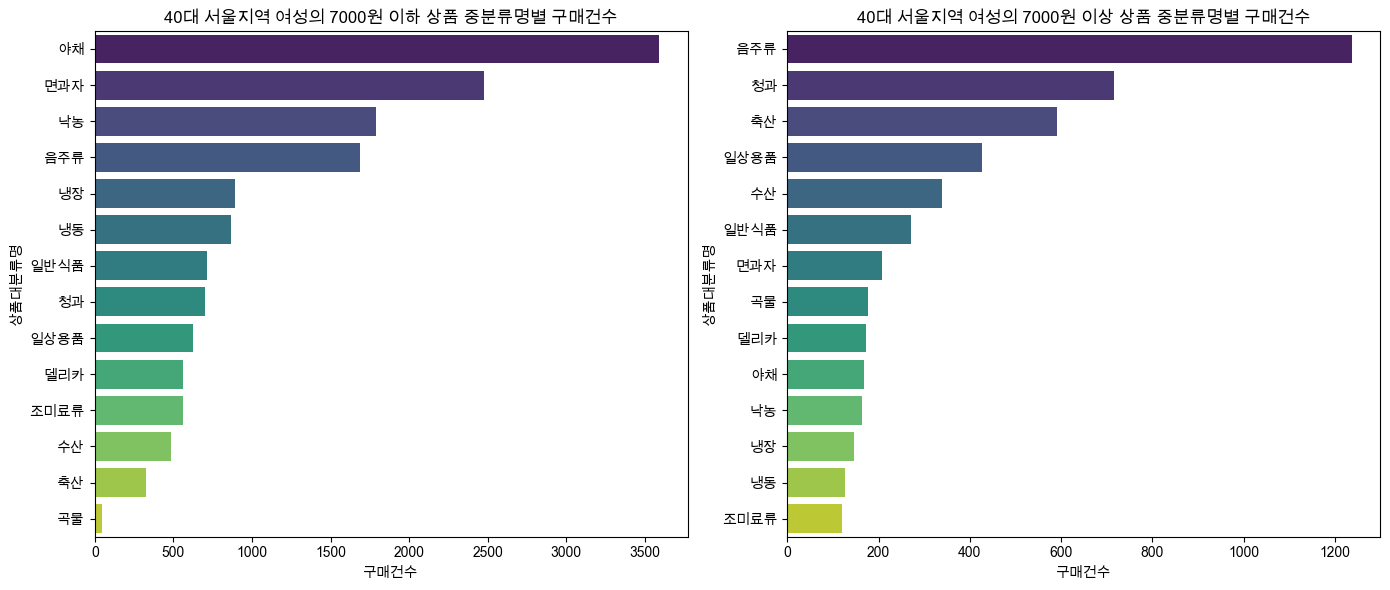

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 40대 서울지역 여성 필터링
filtered_data = merged_df[(merged_df['연령대'] == '40대') & (merged_df['시'] == '서울') & (merged_df['성별'] == 'F')]

# 5000원 이하와 5000원 이상으로 나누기
below_5000 = filtered_data[filtered_data['구매금액'] <= 7000]
above_5000 = filtered_data[filtered_data['구매금액'] > 7000]

# 5000원 이하의 상품 중분류명별 구매건수 계산
below_5000_category_purchase_count = below_5000.groupby('상품대분류명')['구매건수'].sum().reset_index()
below_5000_category_purchase_count = below_5000_category_purchase_count.sort_values(by='구매건수', ascending=False)

# 5000원 이상의 상품 중분류명별 구매건수 계산
above_5000_category_purchase_count = above_5000.groupby('상품대분류명')['구매건수'].sum().reset_index()
above_5000_category_purchase_count = above_5000_category_purchase_count.sort_values(by='구매건수', ascending=False)

# 시각화: 5000원 이하
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=below_5000_category_purchase_count, x='구매건수', y='상품대분류명', palette='viridis')
plt.title('40대 서울지역 여성의 7000원 이하 상품 중분류명별 구매건수')
plt.xlabel('구매건수')
plt.ylabel('상품대분류명')

# 시각화: 5000원 이상
plt.subplot(1, 2, 2)
sns.barplot(data=above_5000_category_purchase_count, x='구매건수', y='상품대분류명', palette='viridis')
plt.title('40대 서울지역 여성의 7000원 이상 상품 중분류명별 구매건수')
plt.xlabel('구매건수')
plt.ylabel('상품대분류명')

plt.tight_layout()
plt.show()


In [ ]:
야채,냉동,냉장   <->   축산,곡물

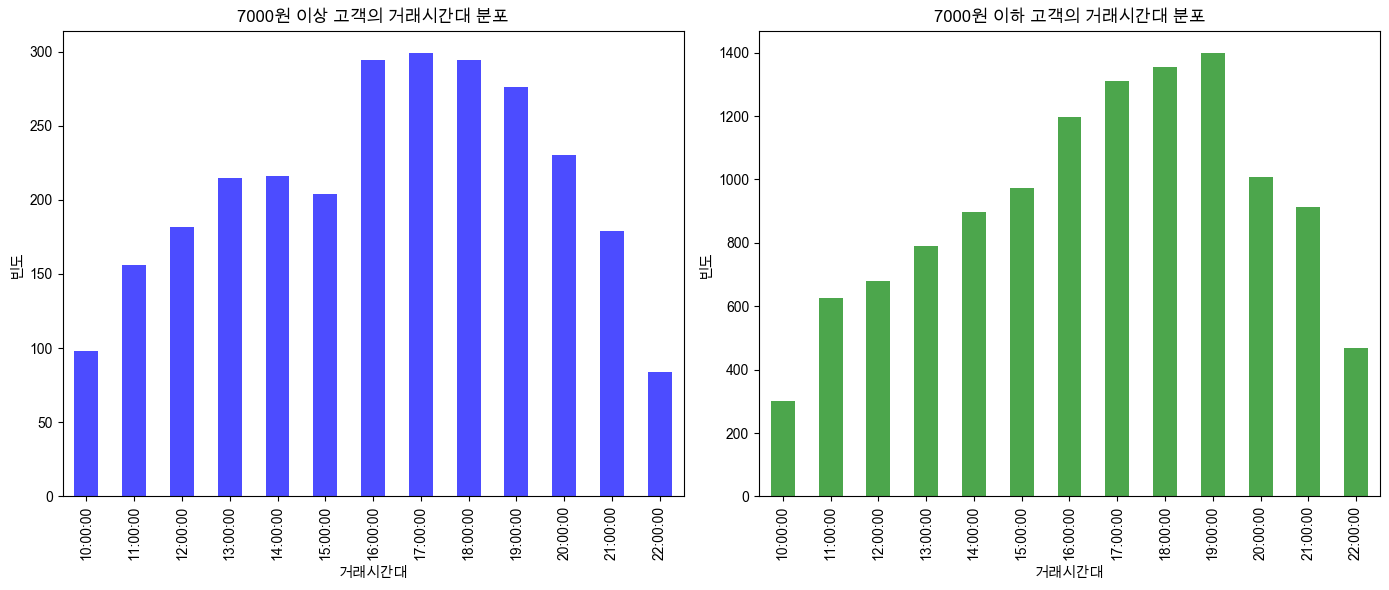

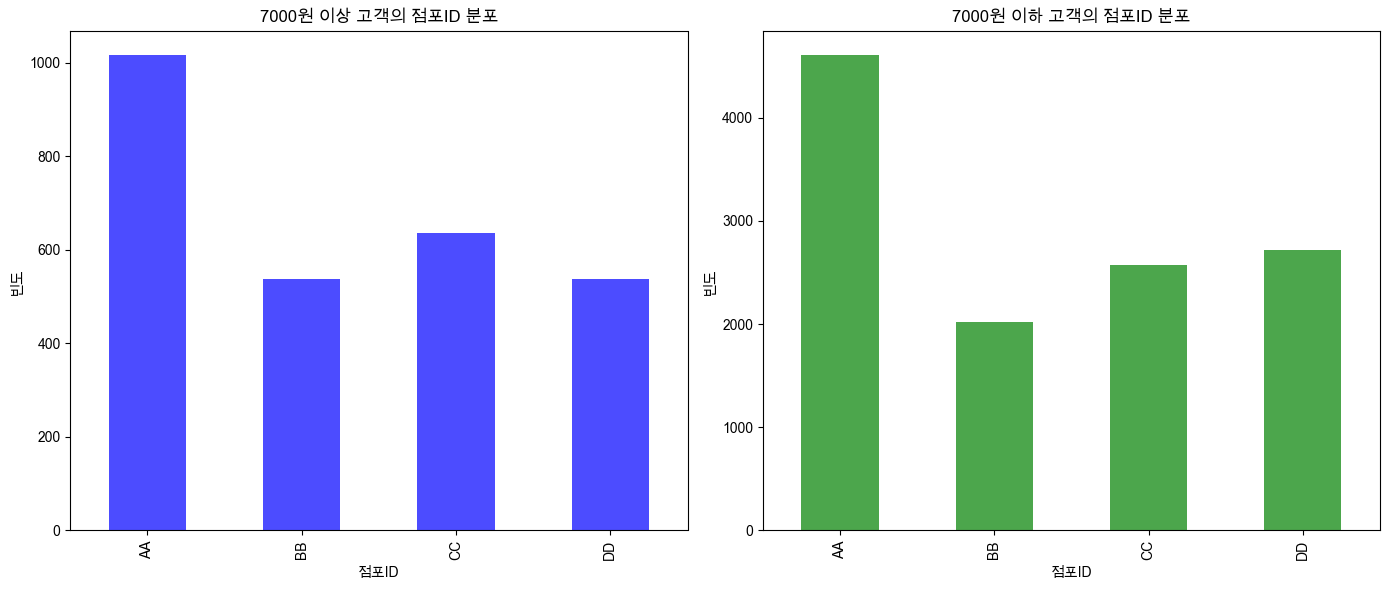

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 서울 여성 40대 고객으로 필터링
filtered_df = merged_df[(merged_df['성별'] == 'F') &
                        (merged_df['연령대'] == '40대') &
                        (filtered_df['시'] == '서울')]

# 7000원 이상/이하로 나누기
over_7000 = filtered_df[filtered_df['구매금액'] >= 7000]
under_7000 = filtered_df[filtered_df['구매금액'] < 7000]

# 거래시간대 분포 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
over_7000['거래시간대'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title('7000원 이상 고객의 거래시간대 분포')
plt.xlabel('거래시간대')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
under_7000['거래시간대'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('7000원 이하 고객의 거래시간대 분포')
plt.xlabel('거래시간대')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

# 점포ID 분포 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
over_7000['점포ID'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title('7000원 이상 고객의 점포ID 분포')
plt.xlabel('점포ID')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
under_7000['점포ID'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('7000원 이하 고객의 점포ID 분포')
plt.xlabel('점포ID')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()


# 가설설정  -> 모델학습

In [ ]:
가설설정 : 구매금액에 따른 구매 패턴 차이: 40대 서울지역 여성의 구매금액과 구매 패턴 사이에 상관관계가 있을 것이다.
         구매금액이 높은 고객(4000원 이상)과 구매금액이 낮은 고객(4000원 이하) 간에 구매 패턴이 다를 것이다.

모델: 분류 모델 (랜덤 포레스트)
목표: 분류모델을 사용하여 구매 패턴을 통해 고객의 구매금액을 예측

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 구매금액 구간 생성
bins = [ 0,1000,2000,7000,11000,20000,float('inf')]
labels = [1, 2, 3, 4, 5, 6]  # 각 구간을 숫자로 레이블
merged_df['구매금액구간'] = pd.cut(merged_df['구매금액'], bins=bins, labels=labels)

# 특성 추출 (예: 상품중분류명을 원-핫 인코딩)
X = pd.get_dummies(merged_df[['상품대분류명', '상품중분류명']], drop_first=True)
y = merged_df['구매금액구간']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.56      0.12      0.20      1362
           2       0.39      0.26      0.31      2219
           3       0.57      0.90      0.69      5739
           4       0.45      0.10      0.16      1276
           5       0.40      0.15      0.22       636
           6       0.79      0.15      0.25       208

    accuracy                           0.54     11440
   macro avg       0.53      0.28      0.31     11440
weighted avg       0.51      0.54      0.47     11440



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# 데이터 준비
filtered_data['구매금액_카테고리'] = pd.cut(filtered_data['구매금액'], bins=[0, 7000, float('inf')], labels=['7000원 이하', '7000원 이상'])

# 특성 추출
X = pd.get_dummies(filtered_data[['상품대분류명','상품중분류명']], drop_first=True)
y = filtered_data['구매금액_카테고리']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'filtered_data' is not defined

## 연관규칙분석(장바구니분석)

In [ ]:
(서울지역 40대 여성 구매금액 :7000원 이하)고객의 장바구니 분석

In [41]:
import pandas as pd

# 서울 여성 40대 고객으로 필터링
filtered_df = merged_df[(merged_df['성별'] == 'F') &
                        (merged_df['연령대'] == '40대') &
                        (merged_df['시'] == '서울') &
                        (merged_df['구매금액'] <= 7000)]

# 거래식별ID로 그룹화하여 동시에 구매한 품목 확인
grouped_sales = filtered_df.groupby('거래식별ID')['상품대분류명'].apply(list).reset_index()

# 결과 확인
grouped_sales.head(20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,거래식별ID,상품대분류명
0,A000001,[일반식품]
1,A000021,"[야채, 야채, 야채, 야채, 야채, 야채, 음주류, 음주류]"
2,A000041,"[야채, 야채]"
3,A000045,[냉장]
4,A000057,[면과자]
5,A000070,[면과자]
6,A000077,"[낙농, 냉장]"
7,A000086,"[야채, 조미료류, 청과]"
8,A000101,"[야채, 야채, 야채, 야채, 조미료류]"
9,A000102,"[낙농, 야채, 야채, 야채, 음주류]"


In [42]:
# 리스트 형태로 변환
transactions = grouped_sales['상품대분류명'].tolist()

# 리스트 데이터 확인 (예시로 처음 5개 트랜잭션 출력)
for i, transaction in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {transaction}")


Transaction 1: ['일반식품']
Transaction 2: ['야채', '야채', '야채', '야채', '야채', '야채', '음주류', '음주류']
Transaction 3: ['야채', '야채']
Transaction 4: ['냉장']
Transaction 5: ['면과자']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 트랜잭션 데이터를 TransactionEncoder를 사용하여 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

#Apriori 알고리즘 적용
#항목 집합의 최소 지지도 (min_support): 0.5%이상 (빈도가 충분히 높은 아이템셋만을 고려한다)
#최소 신뢰도 임계값 (min_threshold): 신뢰도가 최소 10%이상 이어야한다
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# 포함된 상품의 수 열 추가
rules['포함된 상품수'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))


# 결과 확인
print(rules.shape)
rules.head(20)

(50, 11)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,포함된 상품수
0,(냉동),(낙농),0.056702,0.186086,0.006363,0.112219,0.603052,-0.004188,0.916796,-0.411002,2
1,(냉장),(낙농),0.107607,0.186086,0.015696,0.145861,0.783835,-0.004329,0.952905,-0.236077,2
2,(낙농),(면과자),0.186086,0.238688,0.034785,0.186930,0.783157,-0.009631,0.936343,-0.253835,2
3,(면과자),(낙농),0.238688,0.186086,0.034785,0.145735,0.783157,-0.009631,0.952765,-0.266696,2
4,(수산),(낙농),0.062500,0.186086,0.007919,0.126697,0.680851,-0.003712,0.931995,-0.333333,2
5,(낙농),(야채),0.186086,0.326216,0.039310,0.211246,0.647565,-0.021394,0.854239,-0.400723,2
6,(야채),(낙농),0.326216,0.186086,0.039310,0.120503,0.647565,-0.021394,0.925431,-0.446825,2
7,(음주류),(낙농),0.132070,0.186086,0.016686,0.126338,0.678925,-0.007891,0.931612,-0.352701,2
8,(일반식품),(낙농),0.077347,0.186086,0.011029,0.142596,0.766291,-0.003364,0.949277,-0.248434,2
9,(일상용품),(낙농),0.069853,0.186086,0.009757,0.139676,0.750600,-0.003242,0.946055,-0.263200,2


## 평가지표 : Support, Confidence, Lift
Support (지지도):
특정 아이템셋이 전체 거래 중 얼마나 자주 나타나는지.
직관적 설명: 특정 상품 조합이 전체 구매에서 얼마나 자주 등장하는지 비율을 나타냅니다.
예시: "수산과 야채를 함께 구매한 비율이 2%"이면, 전체 거래의 2%에서 수산과 야채가 함께 구매되었다는 의미입니다.

Confidence (신뢰도):
연관 규칙에서 선행 항목(A)이 발생했을 때 후행 항목(B)도 발생할 확률.
직관적 설명: 특정 상품을 구매한 고객이 또 다른 특정 상품을 구매할 확률을 나타냅니다.
예시: "수산을 구매한 고객 중 33%가 야채도 구매"이면, 수산을 구매한 사람 중 33%는 야채도 구매했다는 의미입니다.

Lift:
선행 항목(A)이 발생했을 때 후행 항목(B)이 발생할 확률이, A가 없을 때보다 몇 배 높은지.
직관적 설명: 두 상품 간의 실제 연관성이 얼마나 강한지 나타냅니다.
예시: "Lift가 1.5"이면, 수산을 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 1.5배 높다는 의미입니다

In [44]:
# Lift가 1보다 큰 규칙들을 필터링하여 의미 있는 규칙들을 확인
significant_rules = rules[rules['lift'] > 1]

# 결과 확인
significant_rules.head(20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,포함된 상품수
30,(수산),(야채),0.062500,0.326216,0.020928,0.334842,1.026441,0.000539,1.012968,0.027477,2
41,"(면과자, 야채)",(냉장),0.044825,0.107607,0.005515,0.123028,1.143307,0.000691,1.017584,0.131227,3
44,"(수산, 면과자)",(야채),0.011595,0.326216,0.005090,0.439024,1.345809,0.001308,1.201093,0.259967,3
45,"(수산, 야채)",(면과자),0.020928,0.238688,0.005090,0.243243,1.019085,0.000095,1.006020,0.019128,3
46,"(면과자, 야채)",(수산),0.044825,0.062500,0.005090,0.113565,1.817035,0.002289,1.057607,0.470754,3


In [ ]:
**(수산) -> (야채):수산을 구매한 고객 중 약 33.48%가 야채도 구매했으며, 수산을 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 약 1.03배 높습니다.
**(면과자, 야채) -> (냉장):면과자와 야채를 함께 구매한 고객 중 약 12.30%가 냉장도 구매했으며, 면과자와 야채를 함께 구매한 경우 냉장을 구매할 확률이 일반적으로 냉장을 구매할 확률보다 약 1.14배 높습니다.
**(면과자, 야채) -> (수산):면과자와 야채를 함께 구매한 고객 중 약 11.36%가 수산도 구매했으며, 면과자와 야채를 함께 구매한 경우 수산을 구매할 확률이 일반적으로 수산을 구매할 확률보다 약 1.82배 높습니다.
**(수산, 야채) -> (면과자):수산과 야채를 함께 구매한 고객 중 약 24.32%가 면과자도 구매했으며, 수산과 야채를 함께 구매한 경우 면과자를 구매할 확률이 일반적으로 면과자를 구매할 확률보다 약 1.02배 높습니다.
**(면과자, 수산) -> (야채):면과자와 수산을 함께 구매한 고객 중 약 43.90%가 야채도 구매했으며, 면과자와 수산을 함께 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 약 1.35배 높습니다.

In [46]:
# Lift가 1보다 큰 규칙들을 필터링하여 의미 있는 규칙들을 확인
significant_rules = rules[rules['confidence'] > 0.3]

# 결과 확인
significant_rules.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,포함된 상품수
30,(수산),(야채),0.062500,0.326216,0.020928,0.334842,1.026441,0.000539,1.012968,0.027477,2
35,(청과),(야채),0.078196,0.326216,0.023897,0.305606,0.936820,-0.001612,0.970319,-0.068174,2
44,"(수산, 면과자)",(야채),0.011595,0.326216,0.005090,0.439024,1.345809,0.001308,1.201093,0.259967,3


In [45]:
**(수산) -> (야채)**: 수산을 구매한 고객 중 약 33.48%가 야채도 구매했으며, 수산을 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 약 1.03배 높습니다.
**(청과) -> (야채)**: 청과를 구매한 고객 중 약 30.56%가 야채도 구매했으며, 청과를 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 약간 낮습니다.
**(면과자, 수산) -> (야채)**: 면과자와 수산을 함께 구매한 고객 중 약 43.90%가 야채도 구매했으며, 면과자와 수산을 함께 구매한 경우 야채를 구매할 확률이 일반적으로 야채를 구매할 확률보다 약 1.35배 높습니다.

특정 상품을 구매한 고객에게 연관된 다른 상품을 추천하는 데 사용할 수 있습니다.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid decimal literal (<ipython-input-45-87d75eef05b1>, line 1)

In [ ]:
#전체 고객
# 거래식별ID로 그룹화하여 동시에 구매한 품목 확인
#grouped_sales = sales.groupby('거래식별ID')['상품대분류명'].apply(list).reset_index()

# 결과 확인
#grouped_sales.head(20)

In [ ]:
# 구매금액이 높은 상위 20% 고객으로 필터링
#threshold = merged_df['구매금액'].quantile(0.80)
#filtered_df = merged_df[merged_df['구매금액'] > threshold]

# 거래식별ID로 그룹화하여 동시에 구매한 품목 확인
#grouped_sales = filtered_df.groupby('거래식별ID')['상품대분류명'].apply(list).reset_index()

# 결과 확인
#grouped_sales.head(20)


# 회귀분석

In [ ]:
머신러닝 -> 지도학습 -> 범주형(분류모델)의 평가지표는?

    1. 정확도 : 정확하게 분류한 데이터 수 /전체데이터수,   정상:990, 불량:10개     모든제품을 정상으로 판별 -> 정확도만 가지고는 성능평가 불가

       <confusion Matrix>
        실제정상   실제불량
예측정상   940(TN)   40(FN)

예측불량   10(FP)    10(TP)

TN,TP는 문제없음
FN(false negative), FP(false positive) 문제있음

   2. 정밀도(precision) : TP/FP+TP  = 0.5
   3. 재현율(recall) : TP/FN+TP   = 0.2
   4. F-1 score(조화평균) : = 2*정밀도*재현율/정밀도+재현율  -> 불량을 불량으로, 정상을 정상으로

In [ ]:
머신러닝 -> 지도학습 -> 연속형(회귀모델)의 평가지표는?
    1. R2 (결정계수) : 1- SSE/SST
    2. MSE(Mean square Error) : SSE를 데이터개수로 나눈것(평균낸것) = SSE/N
    3. MAE : SSE의 절댓값 데이터 개수로 나눈것
    4. RMSE : MSE를 루트씌운 것


    1,2번 위주로 쓴다